In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import seaborn as sns
import pylab
import scipy
import scipy.stats
import numpy as np
import math
sns.set_style('whitegrid')

In [2]:
%matplotlib inline

In [3]:
titanic = pd.read_excel("datasets.xls", sheetname="Titanic").dropna()

In [4]:
male_survived = titanic.groupby(["PClass", "Survived"])['Sex'].value_counts()[:,1,'male']
male_died = titanic.groupby(["PClass", "Survived"])['Sex'].value_counts()[:,0,'male']
female_survived = titanic.groupby(["PClass", "Survived"])['Sex'].value_counts()[:,1,'female']
female_died = titanic.groupby(["PClass", "Survived"])['Sex'].value_counts()[:,0,'female']

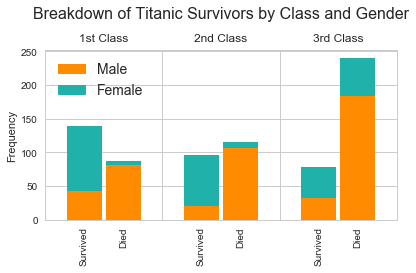

In [11]:
fig, ax = plt.subplots(1)

ax.bar([1, 4, 7], male_survived,
       width=0.9, color='darkorange', label="Male")
ax.bar([2, 5, 8], male_died,
       width=0.9, color='darkorange')
ax.bar([1, 4, 7], female_survived,
       width=0.9, color='lightseagreen', bottom=male_survived,
       label="Female")
ax.bar([2, 5, 8], female_died,
       width=0.9, color='lightseagreen', bottom=male_died)

ax.set_xlim(0, 9)
plt.xticks([1, 2, 4, 5, 7, 8],
           ['Survived', 'Died']*3, rotation='vertical')
ax.set_xticks([3, 6], minor=True)
ax.xaxis.grid(False, which='major')
ax.xaxis.grid(True, which='minor')
ax2 = ax.twiny()

plt.sca(ax2)
plt.xticks([1.5, 4.5, 7.5],
           ["1st Class", "2nd Class", "3rd Class"], fontsize=12)
ax2.set_xlim(0, 9)
ax2.xaxis.grid(False, which='both')

ax.legend(loc=0, fontsize=14)
ax.set_ylabel("Frequency")
ax2.set_title("Breakdown of Titanic Survivors by Class and Gender",
              fontsize=16, y=1.15)
plt.tight_layout()
plt.show()

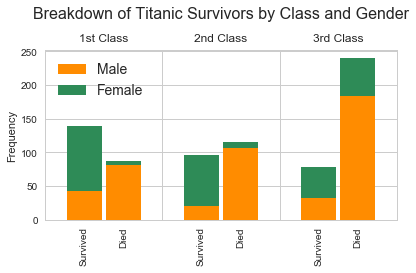

In [45]:
fig, ax = plt.subplots(1)

ax.bar([1, 4, 7], male_survived,
       width=0.9, color='darkorange', label='Male')
ax.bar([2, 5, 8], male_died,
       width=0.9, color='darkorange')
ax.bar([1, 4, 7], female_survived,
       width=0.9, color='seagreen', bottom=male_survived,
      label='Female')
ax.bar([2, 5, 8], female_died,
       width=0.9, color='seagreen', bottom=male_died)

ax.set_xlim(0, 9)
plt.xticks([1, 2, 4, 5, 7, 8],
           ['Survived', 'Died']*3, rotation='vertical')
ax.set_xticks([3, 6], minor=True)
ax.xaxis.grid(False, which='major')
ax.xaxis.grid(True, which='minor')
ax2 = ax.twiny()

plt.sca(ax2)
plt.xticks([1.5, 4.5, 7.5],
           ["1st Class", "2nd Class", "3rd Class"], fontsize=12)
ax2.set_xlim(0, 9)
ax2.xaxis.grid(False, which='both')

ax.legend(loc=0, fontsize=14)
ax.set_ylabel("Frequency")
ax.set_title("Breakdown of Titanic Survivors by Class and Gender",
              fontsize=16, y=1.15)
plt.tight_layout()
# plt.show()

plt.savefig("titanic_6.pdf")

In [13]:
olympics = pd.read_excel("datasets.xls", sheetname="200m Women Olympics").dropna()

In [14]:
olympics

,Year,Athlete,Medal,Country,Result
0,1948,Fanny Blankers-Koen,GOLD,NED,24.40
1,1948,Audrey Williamson,SILVER,GBR,25.10
2,1948,Audrey Patterson,BRONZE,USA,25.20
3,1948,Shirley Strickland,BRONZE,AUS,25.20
4,1952,Marjorie Jackson,GOLD,AUS,23.70
5,1952,Bertha Brouwer,SILVER,NED,24.20
6,1952,Nadezhda Khnykina,BRONZE,URS,24.20
7,1956,Betty Cuthbert,GOLD,AUS,23.40
8,1956,Christa Stubnick,SILVER,GER,23.70
9,1956,Marlene Mathews,BRONZE,AUS,23.80


In [15]:
olympics_nodup = olympics[olympics.index != 3]

In [16]:
usa_x = olympics[olympics['Country']=='USA']['Year']
usa_y = olympics[olympics['Country']=='USA']['Result']

In [17]:
gold = olympics_nodup[olympics_nodup['Medal']=='GOLD']['Result']
silver = olympics_nodup[olympics_nodup['Medal']=='SILVER']['Result']
bronze = olympics_nodup[olympics_nodup['Medal']=='BRONZE']['Result']
dates = sorted(list(set(olympics_nodup['Year'])))

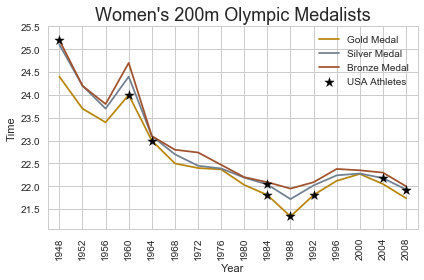

In [54]:
fig, ax = plt.subplots(1)
ax.plot(dates, gold, c='darkgoldenrod', zorder=1, label='Gold Medal')
ax.plot(dates, silver, c='slategray', zorder=1, label='Silver Medal')
ax.plot(dates, bronze, c='sienna', zorder=1, label='Bronze Medal')

ax.scatter(usa_x, usa_y,
                 facecolor='black', marker='*', s=100, zorder=2, label='USA Athletes')

plt.legend()

plt.xticks(dates, rotation='vertical')
ax.set_xlim([1946, 2010])
ax.set_xlabel("Year")
ax.set_ylabel("Time")
ax.set_title("Women's 200m Olympic Medalists", fontsize=18)

plt.tight_layout()
# plt.show()
plt.savefig("olympics_8.pdf")

In [55]:
def f(x, y):
    return -(3*x**2+y**2)*math.exp(-x**2-y**2)

In [56]:
xs = np.arange(-2, 2.2, 0.1)
ys = np.arange(-2, 2.2, 0.1)

z = []
for y in ys[:-1]:
    z.append([])
    for x in xs[:-1]:
        z[-1].append(f(x, y))

In [57]:
X,Y = np.meshgrid(xs, ys)

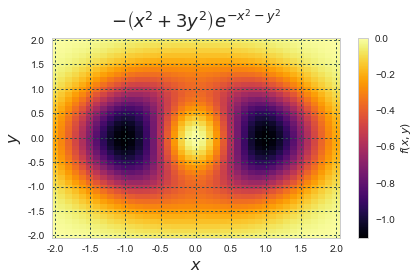

In [74]:
fig, ax = plt.subplots(1)
hm = ax.pcolor(X, Y, z, cmap='inferno', zorder=0)
# ax.set_xlim(-2, 2.1)
# ax.set_ylim(-2, 2.1)
ticks = np.linspace(-2, 2, 9)
ax.set_xticks([i+0.05 for i in ticks])
ax.set_yticks([i+0.05 for i in ticks])
ax.set_xticklabels(ticks)
ax.set_yticklabels(ticks)
ax.grid(which='major', color='darkslategrey',
        linestyle=':', linewidth=1, axis='both')
cbar = fig.colorbar(hm)
cbar.set_label(r"$f(x, y)$")
ax.set_title(r"$-\left(x^2+3y^2\right)e^{-x^2-y^2}$",
             fontsize=18, y=1.02)
ax.set_xlabel(r"$x$", fontsize=16)
ax.set_ylabel(r"$y$", fontsize=16)
# plt.show()
plt.tight_layout()
plt.savefig('heatmap_7.pdf')

In [75]:
singers = pd.read_excel("datasets.xls", sheetname="Singers").dropna()

In [76]:
singers['voice'] = singers['voice'].apply(lambda x: x[:-2])

In [77]:
voices = ['Bass', 'Tenor', 'Alto', 'Soprano']
heights = [list(singers[singers['voice']==v]['height']) for v in voices]

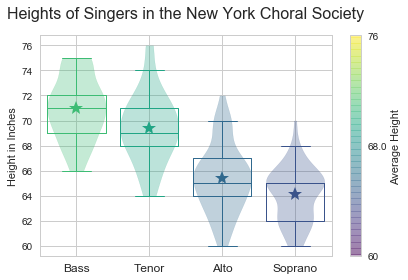

In [97]:
fig, ax = plt.subplots(1)

# Hack to get colorbar
sm = plt.cm.ScalarMappable(cmap=cm.viridis)
sm._A = []

maxy = max([max(data) for data in heights])
miny = min([min(data) for data in heights])
for i, data in enumerate(heights):
#     plot_colour = 'maroon'
    plot_colour = cm.viridis((np.mean(data)-miny)/(maxy-miny))
    meanpointprops = dict(marker='*',markeredgecolor=plot_colour,
                          markerfacecolor=plot_colour, markersize=15)
    bp = ax.boxplot(data, positions=[i+0.5], widths=0.8, meanprops=meanpointprops,
                    showmeans=True)
    vp = ax.violinplot(data, positions=[i+0.5], widths=0.8,
                       showmeans=False, showextrema=False, showmedians=False)
    plt.setp(bp['boxes'], color=plot_colour)
    plt.setp(bp['whiskers'], color=plot_colour)
    plt.setp(bp['medians'], color=plot_colour)
    plt.setp(bp['fliers'], color=plot_colour)
    plt.setp(bp['caps'], color=plot_colour)
    plt.setp(vp['bodies'], color=plot_colour)
ax.set_xticks([i+0.5 for i in range(4)])
ax.set_xticklabels(voices, fontsize=12)
ax.set_ylabel("Height in Inches")
ax.set_title("Heights of Singers in the New York Choral Society",
             fontsize=16, y=1.05)
ax.set_xlim(0, 4)

cbar = fig.colorbar(sm, alpha=0.3)
cbarzero = ((maxy - miny)/2)+miny
cbar.set_ticks([0, 0.5, 1])
cbar.ax.set_yticklabels([miny, cbarzero, maxy])
cbar.set_label("Average Height")

plt.tight_layout()
# plt.show()

plt.savefig('singers_8.pdf')